In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("lc_2016_2017.csv")
data

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_22800\608812482.py:1: DtypeWarning: Columns (18,54) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("lc_2016_2017.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,112435993,NaN,2300,2300,2300.0,36 months,12.62,77.08,C,C1,...,0.0,NaN,1.0,2.0,2315.0,55.0,7100.0,1.0,0.0,2.0
1,112290210,NaN,16000,16000,16000.0,60 months,12.62,360.95,C,C1,...,11078.0,69.0,3.0,5.0,1962.0,94.0,31900.0,0.0,6.0,1.0
2,112436985,NaN,6025,6025,6025.0,36 months,15.05,209.01,C,C4,...,0.0,NaN,1.0,2.0,1950.0,45.0,27700.0,1.0,5.0,3.0
3,112439006,NaN,20400,20400,20400.0,36 months,9.44,652.91,B,B1,...,53566.0,95.0,1.0,2.0,4240.0,60.0,46900.0,1.0,1.0,1.0
4,112438929,NaN,13000,13000,13000.0,36 months,11.99,431.73,B,B5,...,8466.0,72.0,0.0,1.0,2996.0,78.0,7800.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759333,65854936,NaN,6000,6000,6000.0,36 months,7.89,187.72,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,21400.0,NaN,NaN,NaN
759334,66055600,NaN,6000,6000,6000.0,36 months,9.17,191.28,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,18600.0,NaN,NaN,NaN
759335,66141895,NaN,14400,14400,14400.0,60 months,13.18,328.98,C,C3,...,NaN,NaN,NaN,NaN,NaN,NaN,18300.0,NaN,NaN,NaN
759336,65673209,NaN,34050,34050,34050.0,36 months,15.41,1187.21,D,D1,...,NaN,NaN,NaN,NaN,NaN,NaN,47900.0,NaN,NaN,NaN


In [3]:
# data['purpose']

In [4]:
data_shape = data.shape  # Shape of the dataset
data_info = data.info()  # Column information
data_head = data.head()  # Preview the first few rows

data_shape, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           759338 non-null  int64  
 1   member_id                    0 non-null       float64
 2   loan_amnt                    759338 non-null  int64  
 3   funded_amnt                  759338 non-null  int64  
 4   funded_amnt_inv              759338 non-null  float64
 5   term                         759338 non-null  object 
 6   int_rate                     759338 non-null  float64
 7   installment                  759338 non-null  float64
 8   grade                        759338 non-null  object 
 9   sub_grade                    759338 non-null  object 
 10  emp_title                    708368 non-null  object 
 11  emp_length                   708975 non-null  object 
 12  home_ownership               759338 non-null  object 
 13 

((759338, 72),
           id  member_id  loan_amnt  funded_amnt  funded_amnt_inv       term  \
 0  112435993        NaN       2300         2300           2300.0  36 months   
 1  112290210        NaN      16000        16000          16000.0  60 months   
 2  112436985        NaN       6025         6025           6025.0  36 months   
 3  112439006        NaN      20400        20400          20400.0  36 months   
 4  112438929        NaN      13000        13000          13000.0  36 months   
 
    int_rate  installment grade sub_grade  ... total_bal_il il_util  \
 0     12.62        77.08     C        C1  ...          0.0     NaN   
 1     12.62       360.95     C        C1  ...      11078.0    69.0   
 2     15.05       209.01     C        C4  ...          0.0     NaN   
 3      9.44       652.91     B        B1  ...      53566.0    95.0   
 4     11.99       431.73     B        B5  ...       8466.0    72.0   
 
   open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi  \


In [5]:
#data['mths_since_last_record'].median()

## Data Cleaning

1. Removing Irrelevant Columns: Columns like id, member_id, and others that don't contribute to the analysis or predictions.

2. Check for Missing Values: Identify columns with a high percentage of missing values and decide whether to drop them or impute them.



In [6]:
irrelevant_cols = ['id', 'member_id']  # Start with obvious ones
constant_cols = [col for col in data.columns if data[col].nunique() <= 1]  # Check for constant columns


In [7]:
# Combine all columns to drop
columns_to_drop = irrelevant_cols + constant_cols

In [8]:
columns_to_drop

['id', 'member_id', 'member_id', 'policy_code']

In [9]:
cleaned_data = data.drop(columns=columns_to_drop, axis=1)


In [10]:
cleaned_data.shape, cleaned_data.head()


((759338, 69),
    loan_amnt  funded_amnt  funded_amnt_inv       term  int_rate  installment  \
 0       2300         2300           2300.0  36 months     12.62        77.08   
 1      16000        16000          16000.0  60 months     12.62       360.95   
 2       6025         6025           6025.0  36 months     15.05       209.01   
 3      20400        20400          20400.0  36 months      9.44       652.91   
 4      13000        13000          13000.0  36 months     11.99       431.73   
 
   grade sub_grade     emp_title emp_length  ... total_bal_il  il_util  \
 0     C        C1           NaN        NaN  ...          0.0      NaN   
 1     C        C1       teacher  10+ years  ...      11078.0     69.0   
 2     C        C4  Front Office    7 years  ...          0.0      NaN   
 3     B        B1       Manager  10+ years  ...      53566.0     95.0   
 4     B        B5     Paramedic  10+ years  ...       8466.0     72.0   
 
   open_rv_12m open_rv_24m max_bal_bc all_util tota

In [11]:
# Check for missing values
missing_values = cleaned_data.isnull().sum()
missing_percentage = (missing_values / len(cleaned_data)) * 100


In [12]:
missing_values

loan_amnt             0
funded_amnt           0
funded_amnt_inv       0
term                  0
int_rate              0
                   ... 
all_util            114
total_rev_hi_lim      0
inq_fi               61
total_cu_tl          62
inq_last_12m         62
Length: 69, dtype: int64

In [13]:
missing_percentage

loan_amnt           0.000000
funded_amnt         0.000000
funded_amnt_inv     0.000000
term                0.000000
int_rate            0.000000
                      ...   
all_util            0.015013
total_rev_hi_lim    0.000000
inq_fi              0.008033
total_cu_tl         0.008165
inq_last_12m        0.008165
Length: 69, dtype: float64

In [14]:
missing_data_summary = pd.DataFrame({
    #'Column': cleaned_data.columns,
    'Missing Values': missing_values,
    'Percentage Missing': missing_percentage
}).sort_values(by='Percentage Missing', ascending=False)

In [15]:
missing_data_summary.head(15)  # View the top 15 columns with the most missing values


,Missing Values,Percentage Missing
desc,759321,99.997761
dti_joint,725337,95.522284
annual_inc_joint,725335,95.522020
verification_status_joint,725335,95.522020
mths_since_last_record,618159,81.407621
mths_since_last_major_derog,544233,71.672035
mths_since_last_delinq,362705,47.765949
next_pymnt_d,167915,22.113341
il_util,100595,13.247724
emp_title,50970,6.712426


## Handling Missing Data

1. Columns with Very High Missing Percentage (> 95%)

desc, dti_joint, annual_inc_joint, verification_status_joint:

These columns have almost no data (95%+ missing). It's better to drop them as imputation wouldn't be meaningful.

2. Columns with High Missing Percentage (50–95%)

mths_since_last_record, mths_since_last_major_derog:

Evaluate their importance in the analysis or predictive modeling.
If they aren't critical, consider dropping them. Otherwise, use median or a placeholder like -1.

3. Columns with Moderate Missing Percentage (10–50%)

mths_since_last_delinq:

Depending on its importance, you can impute with a placeholder (-1) or the median.

4. Columns with Low Missing Percentage (< 10%)

Columns like next_pymnt_d, il_util, emp_title, etc.:

Impute these using appropriate methods:
Numerical Columns: Use mean/median.
Categorical Columns: Use the most frequent category or "Unknown".

In [16]:
columns_to_drop_missing = ['desc', 'dti_joint', 'annual_inc_joint', 'verification_status_joint']
data_after_missing = cleaned_data.drop(columns=columns_to_drop_missing, axis=1) # axis= 1 means droppping the column

Columns like mths_since_last_record, mths_since_last_major_derog, and mths_since_last_delinq represent the number of months since certain events occurred.
If the data is missing, it could mean the event never occurred, and -1 serves as a placeholder for "no data" or "not applicable."

For numerical features like il_util, revol_util, or any others where the missingness likely doesn't hold specific meaning.

In [17]:
# Use placeholder (-1) for columns with meaningful missing values
for col in ['mths_since_last_record', 'mths_since_last_major_derog', 'mths_since_last_delinq']:
    data_after_missing[col] = data_after_missing[col].fillna(-1)

# Use median for numerical columns with no inherent meaning in missingness
for col in ['il_util', 'revol_util', 'mths_since_rcnt_il']:
    data_after_missing[col] = data_after_missing[col].fillna(data_after_missing[col].median())


In [18]:
# Replace missing categorical values with "Unknown"
data_after_missing['emp_title'] = data_after_missing['emp_title'].fillna("Unknown")
data_after_missing['emp_length'] = data_after_missing['emp_length'].fillna("Unknown")
data_after_missing['title'] = data_after_missing['title'].fillna("Unknown")
data_after_missing['next_pymnt_d'] = data_after_missing['next_pymnt_d'].fillna("Unknown")


In [19]:
# Final check for any remaining missing values
remaining_missing = data_after_missing.isnull().sum()
remaining_missing = data_after_missing.isnull().sum().sum()
data_after_missing.shape, remaining_missing

((759338, 65), 2050)

In [20]:
# Check which columns still have missing values
remaining_missing_summary = data_after_missing.isnull().sum()
remaining_missing_columns = remaining_missing_summary[remaining_missing_summary > 0]

remaining_missing_columns


zip_code                1
dti                   355
inq_last_6mths          1
last_pymnt_d          948
last_credit_pull_d     18
open_acc_6m            62
open_il_12m            61
open_il_24m            61
total_bal_il           61
open_rv_12m            61
open_rv_24m            61
max_bal_bc             61
all_util              114
inq_fi                 61
total_cu_tl            62
inq_last_12m           62
dtype: int64

In [21]:
# Replace missing categorical values with "Unknown"
data_after_missing['zip_code'] = data_after_missing['zip_code'].fillna("Unknown")
data_after_missing['last_pymnt_d'] = data_after_missing['last_pymnt_d'].fillna("Unknown")
data_after_missing['last_credit_pull_d'] = data_after_missing['last_credit_pull_d'].fillna("Unknown")


In [22]:
# Replace missing numerical values with median
numerical_columns = [
    'dti', 'inq_last_6mths', 'open_acc_6m', 'open_il_12m', 'open_il_24m', 
    'total_bal_il', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 
    'inq_fi', 'total_cu_tl', 'inq_last_12m'
]

for col in numerical_columns:
    data_after_missing[col] = data_after_missing[col].fillna(data_after_missing[col].median())


In [23]:
final_missing = data_after_missing.isnull().sum().sum()

data_after_missing.shape, final_missing

((759338, 65), 0)

In [24]:
# loan_amount_data=data_after_missing['loan_amnt']
# loan_amount_data

In [25]:
# grade_data=pd.DataFrame(data_after_missing['grade'])
# grade_data

In [26]:
# data_after_missing_before_feature=data_after_missing
# data_after_missing_before_feature

## Data Visualization

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

## Univariate Analysis

Univariate Analysis is the simplest form of data analysis that involves analyzing and summarizing a single variable or feature in a dataset. The main goal is to understand the distribution, patterns, and characteristics of that variable. It doesn't consider relationships with other variables.

c:\Users\KIIT0001\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


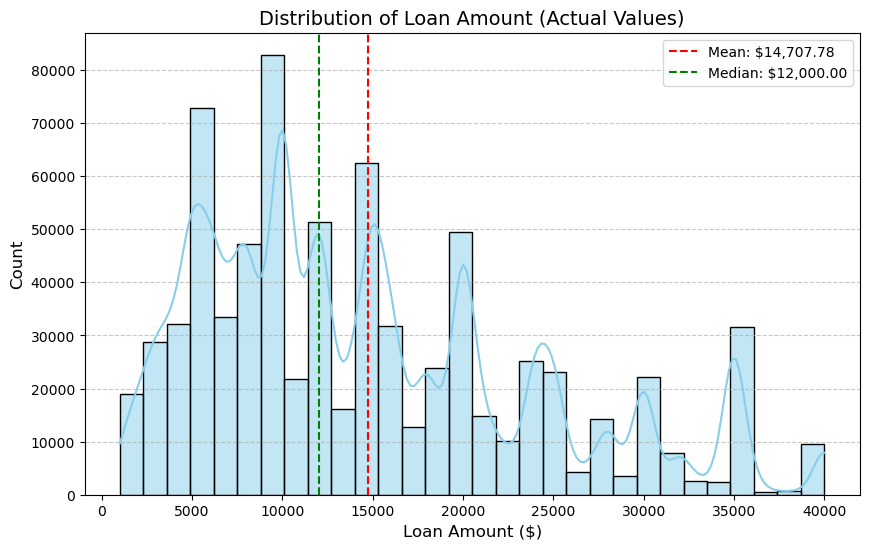

In [25]:
import numpy as np
# Plot the distribution with actual values
plt.figure(figsize=(10, 6))


# A histplot (short for Histogram Plot) is a type of visualization used to represent the distribution of a numerical variable. It shows how data points are distributed across different intervals (or bins), giving an idea of the frequency of values within each interval.

sns.histplot(data_after_missing['loan_amnt'], kde=True, bins=30, color='skyblue')


# KDE stands for Kernel Density Estimation, and it is a way to estimate the probability density function (PDF) of a continuous random variable. In the context of sns.histplot, the kde=True parameter adds a smooth curve (the KDE line) to the histogram to represent the distribution of data in a visually appealing and continuous manner.

# Add mean and median lines
mean_value = data_after_missing['loan_amnt'].mean()
median_value = np.median(data_after_missing['loan_amnt'])
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: ${mean_value:,.2f}') # Draws a vertical line
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: ${median_value:,.2f}')

# Add labels and title
plt.title('Distribution of Loan Amount (Actual Values)', fontsize=14)
plt.xlabel('Loan Amount ($)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# plt.grid:
# Adds horizontal gridlines for better readability.
# linestyle='--' and alpha=0.7: Makes the grid lines visually subtle.
plt.show()

1. Distribution of Loan Amount
Chart: Histogram with a KDE curve showing the distribution of loan_amnt.

Observations:

The loan amounts are not uniformly distributed.
A majority of the loans cluster around specific values, with peaks visible near standardized amounts like 10,000, 20,000, etc., which may represent popular loan packages or limits.
The distribution tails off on both ends, indicating fewer loans with very small or very large amounts.
Insights:

This suggests that borrowers tend to apply for common loan sizes rather than arbitrary amounts, possibly reflecting pre-defined loan packages offered by lenders.


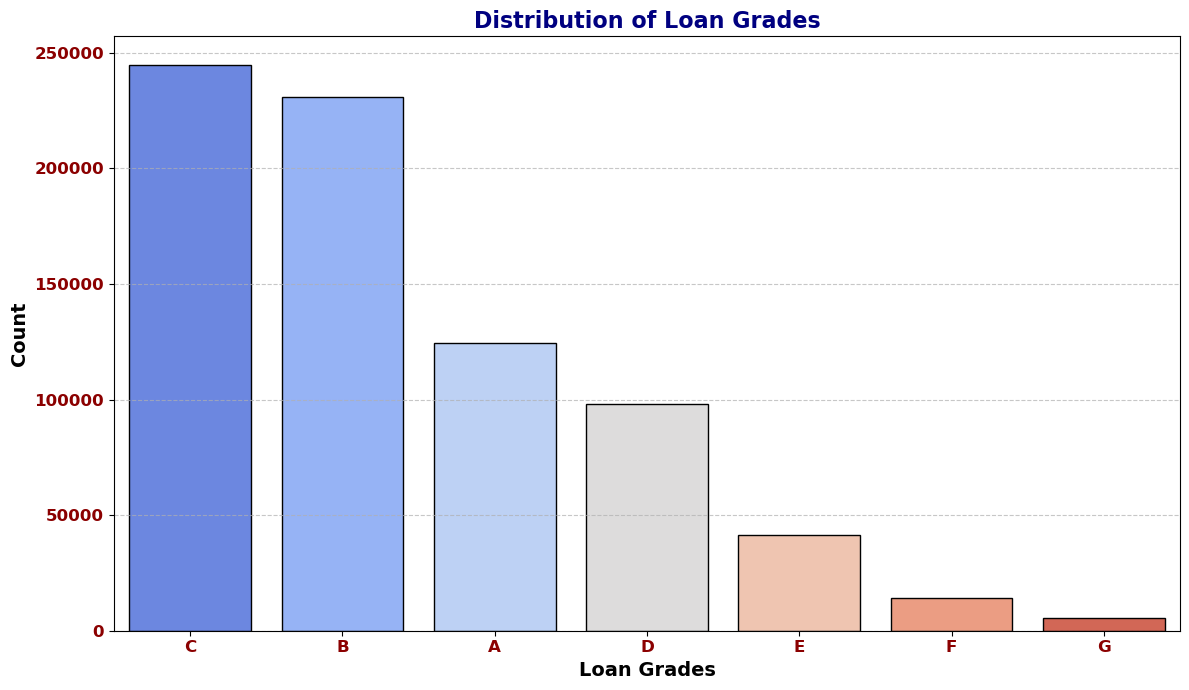

In [26]:
plt.figure(figsize=(12, 7))

# Plotting the countplot with customized colors
sns.countplot(
    x='grade',
    data=data_after_missing,
    order=data_after_missing['grade'].value_counts().index,
    palette='coolwarm',
    saturation=0.85,
    edgecolor='black'
)

# saturation=0.85: Adjusts the color intensity of the bars.


# Adding titles and labels with styling
plt.title('Distribution of Loan Grades', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Loan Grades', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjusting tick parameters
plt.xticks(fontsize=12, fontweight='bold', color='darkred')
plt.yticks(fontsize=12, fontweight='bold', color='darkred')   
# xticks and yticks in Matplotlib are used to customize the ticks (the markings) along the x-axis and y-axis of a plot. They help you control the location, appearance, and labels of the ticks.

plt.tight_layout()
plt.show()

2. Distribution of Loan Grades
Chart: Bar chart of grade.

Observations:

Grades 2 (B) and 1 (A) are the most common, with higher counts compared to the lower grades like 5 (E), 6 (F), and 7 (G).
As the grade value increases, the frequency decreases, indicating that most loans are assigned better credit grades.
Insights:

This likely reflects lending behavior where the majority of borrowers are considered low to medium risk, resulting in better grades.
The smaller count for lower grades suggests that higher-risk loans are less commonly issued, possibly due to stricter lending policies.


Countplot: Used to visualize the frequency of categorical data (e.g., categories like loan grades, gender).
Histplot: 	Used to visualize the distribution of numerical data (e.g., ages, salaries).

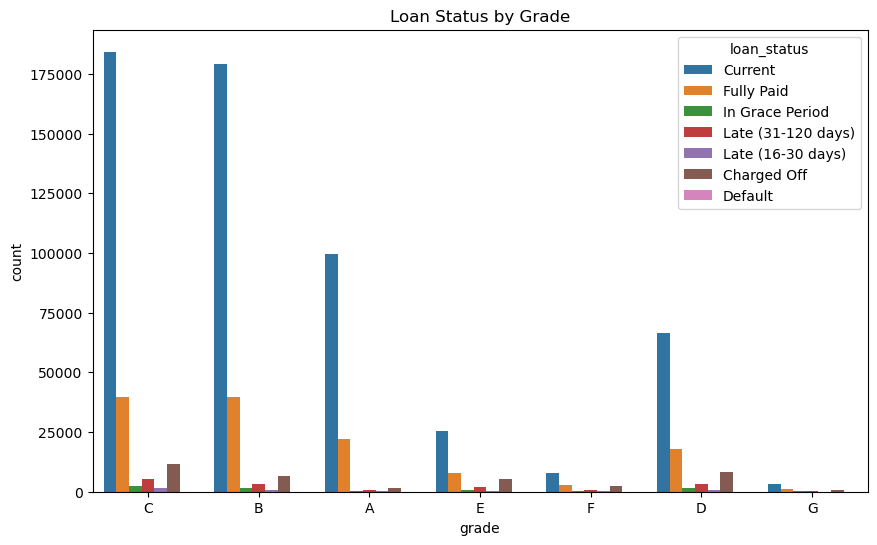

In [27]:
# Bivariate analysis: Grade vs. Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(x='grade', hue='loan_status', data=data_after_missing)
plt.title('Loan Status by Grade')
plt.show()

3. Loan Status by Grade
Chart: Grouped bar chart showing loan_status split by grade.

Observations:

Current loans dominate across all grades, which is expected as many loans are still being paid off.
For better grades (e.g., A, B), the majority of loans are either Fully Paid or Current, with very few Charged Off or Default.
For lower grades (e.g., E, F, G), there’s a visible increase in Charged Off and Default loans.
Insights:

Loan grade is a strong predictor of loan status, as borrowers with better grades (lower numerical values) are less likely to default.
Higher grades (worse credit risk) show increased Default and Charged Off loans, suggesting that loan grade can play a critical role in predicting default risk.


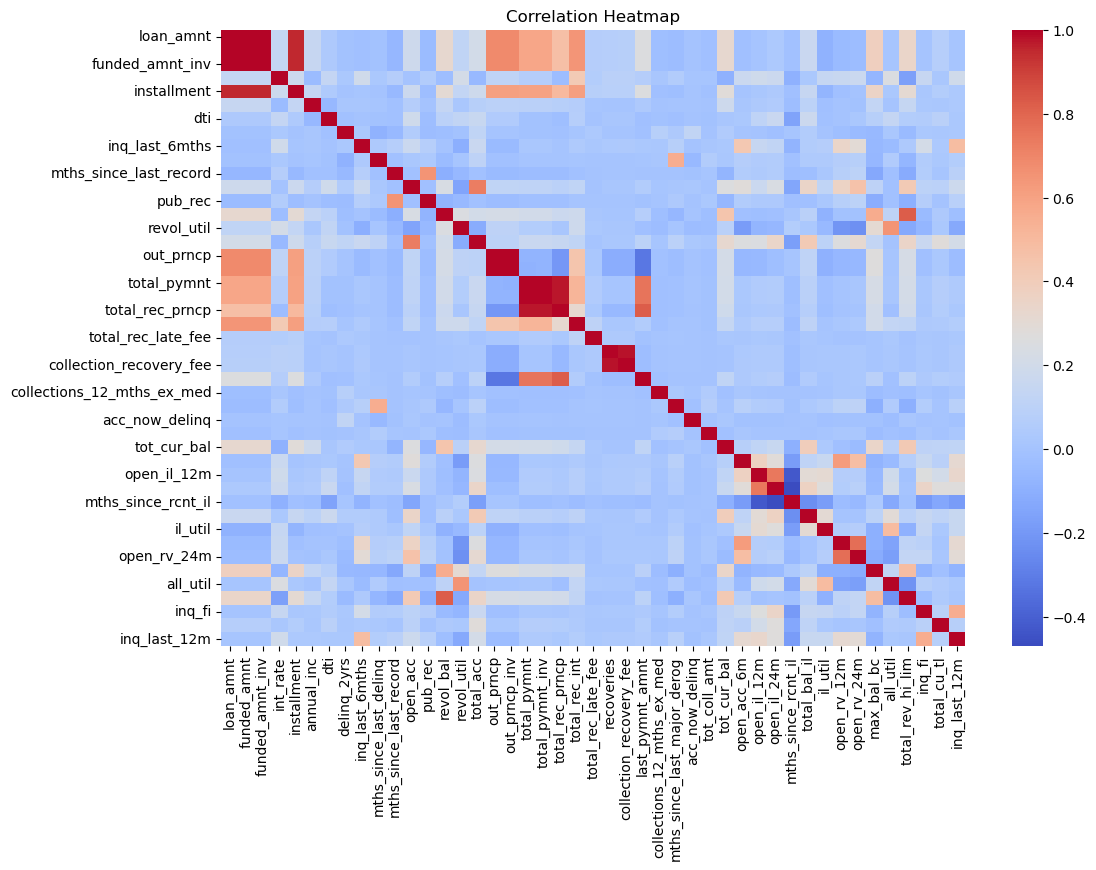

In [28]:
# Select only numerical columns
numerical_features = data_after_missing.select_dtypes(include=['float64', 'int64']).columns

# Generate the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_after_missing[numerical_features].corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()


## Data Aggregation and Visualization

Key Insights from the Correlation Heatmap
High Correlation Pairs:

loan_amnt, funded_amnt, and installment are highly correlated, as expected, since they represent related aspects of the loan amount and repayment.
Moderate Correlations:

total_pymnt and total_rec_prncp show moderate correlation with loan-related features, which is logical since these are payments and principal amounts.
revol_util shows some moderate correlation with credit-related features, indicating credit utilization impacts other metrics.
Low or No Correlation:

Features like mths_since_last_record or collections_12_mths_ex_med have low correlations with most variables, suggesting they may not have strong relationships with other features.


In [29]:
grade_aggregation = data_after_missing.groupby('grade').agg({
    'loan_amnt': 'mean',
    'int_rate': 'mean',
    'loan_status': lambda x: (x.isin(['Charged Off', 'Default']).sum() / len(x)) * 100  # Default rate in %
}).reset_index()

In [ ]:
# Operation:
# x.isin(['Charged Off', 'Default']):
# Checks if each value in the loan_status column is either Charged Off or Default.
# Returns a boolean series, where True represents rows with these statuses.
# .sum():
# Counts the number of True values, i.e., the total number of loans that are either Charged Off or Default.
# len(x):
# Gives the total number of loans in the group (all loan statuses).
# Division and multiplication:
# Calculates the percentage of defaulted loans by dividing the number of defaults by the total loans in the group, then multiplying by 100.

In [30]:
grade_aggregation.columns = ['Grade', 'Avg Loan Amount', 'Avg Interest Rate (%)', 'Default Rate (%)']

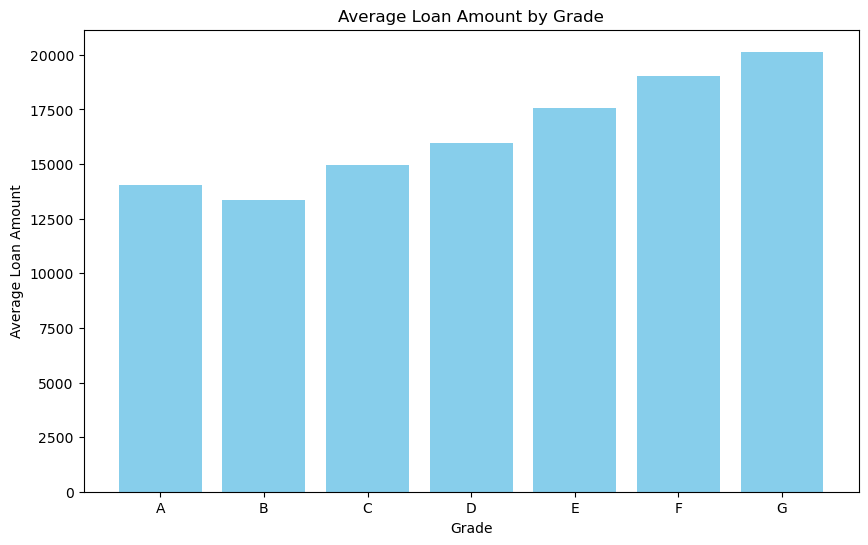

In [31]:
# Visualization: Average Loan Amount by Grade
plt.figure(figsize=(10, 6))
plt.bar(grade_aggregation['Grade'], grade_aggregation['Avg Loan Amount'], color='skyblue')
plt.title('Average Loan Amount by Grade')
plt.xlabel('Grade')
plt.ylabel('Average Loan Amount')
plt.show()

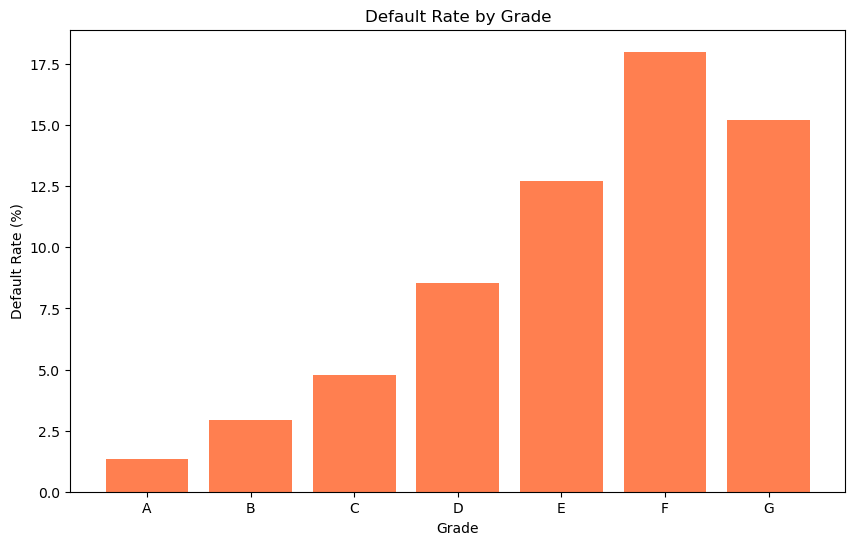

In [32]:
# Visualization: Default Rate by Grade
plt.figure(figsize=(10, 6))
plt.bar(grade_aggregation['Grade'], grade_aggregation['Default Rate (%)'], color='coral')
plt.title('Default Rate by Grade')
plt.xlabel('Grade')
plt.ylabel('Default Rate (%)')
plt.show()


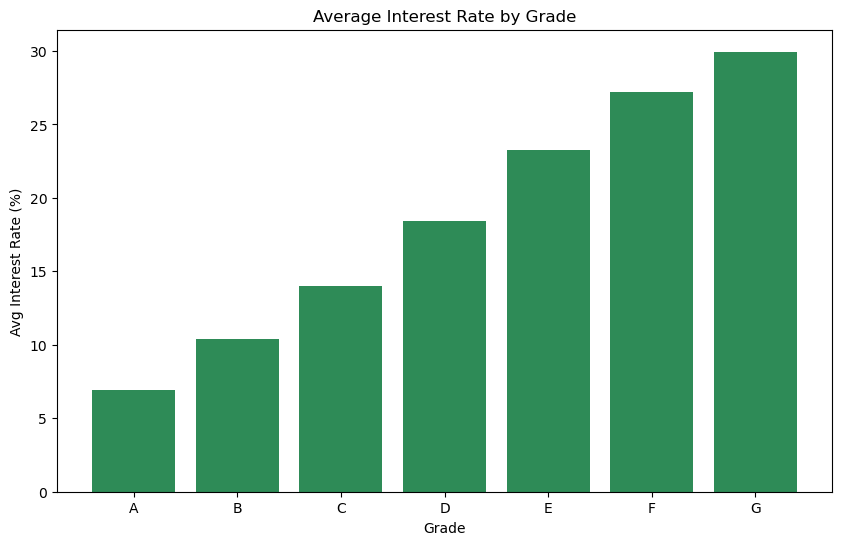

In [33]:
# Visualization: Average Interest Rate by Grade
plt.figure(figsize=(10, 6))
plt.bar(grade_aggregation['Grade'], grade_aggregation['Avg Interest Rate (%)'], color='seagreen')
plt.title('Average Interest Rate by Grade')
plt.xlabel('Grade')
plt.ylabel('Avg Interest Rate (%)')
plt.show()


In [34]:
grade_aggregation

,Grade,Avg Loan Amount,Avg Interest Rate (%),Default Rate (%)
0,A,14020.757407,6.926255,1.333954
1,B,13375.654443,10.383187,2.938386
2,C,14952.771097,14.012157,4.795368
3,D,15959.760816,18.433611,8.549582
4,E,17573.305013,23.277901,12.709071
5,F,19028.284710,27.224677,18.005849
6,G,20143.981398,29.948678,15.206791


In [35]:
# Aggregate data by loan purpose
purpose_aggregation = data_after_missing.groupby('purpose').agg({
    'loan_amnt': 'mean',
    'int_rate': 'mean',
    'loan_status': lambda x: (x.isin(['Charged Off', 'Default']).sum() / len(x)) * 100  # Default rate in %
}).reset_index()

In [36]:
purpose_aggregation.columns = ['Purpose', 'Avg Loan Amount', 'Avg Interest Rate (%)', 'Default Rate (%)']


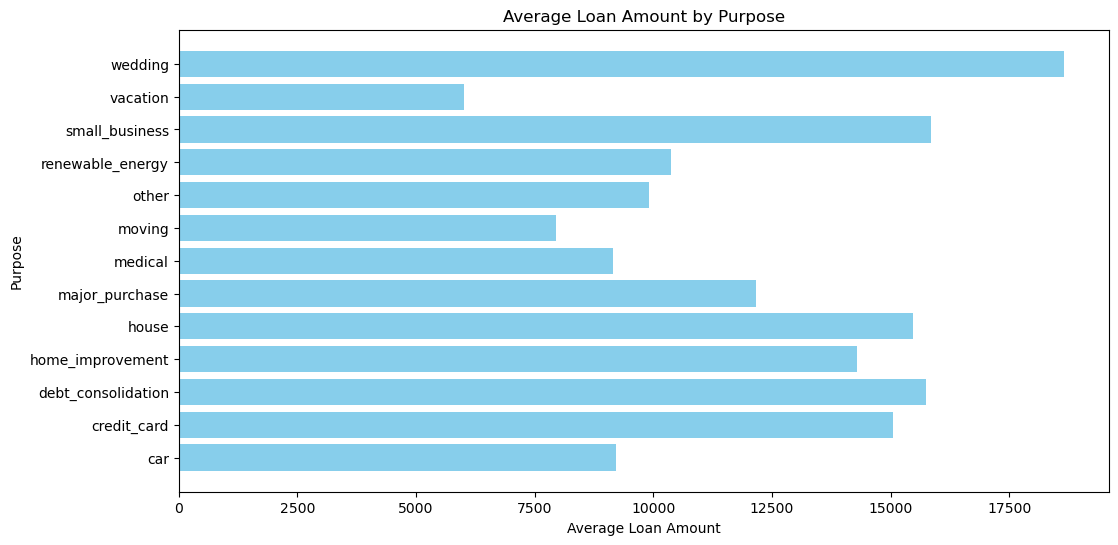

In [37]:
# Visualization: Average Loan Amount by Purpose
plt.figure(figsize=(12, 6))
plt.barh(purpose_aggregation['Purpose'], purpose_aggregation['Avg Loan Amount'], color='skyblue')
plt.title('Average Loan Amount by Purpose')
plt.xlabel('Average Loan Amount')
plt.ylabel('Purpose')
plt.show()

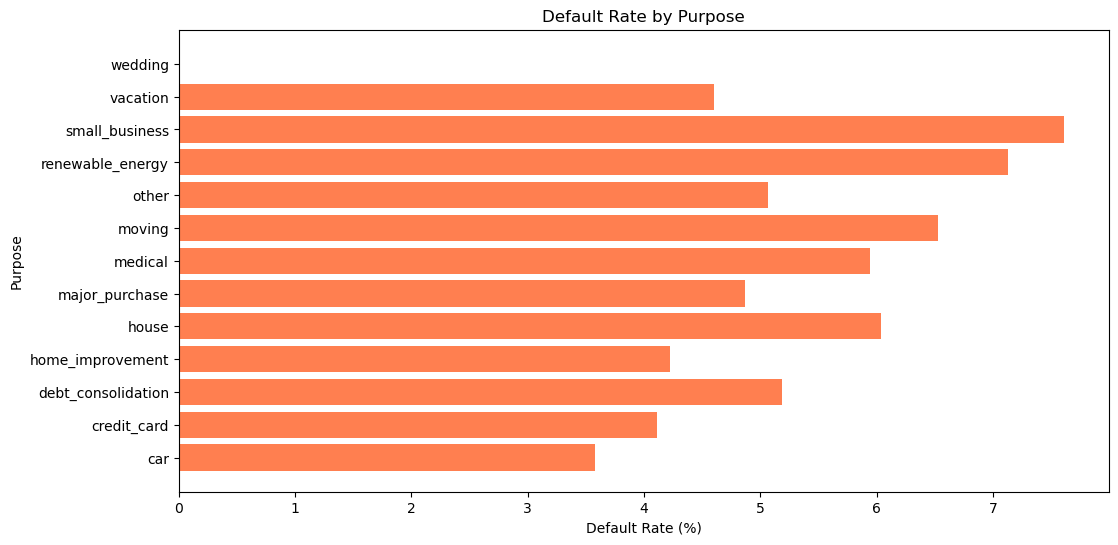

In [38]:
# Visualization: Default Rate by Purpose
plt.figure(figsize=(12, 6))
plt.barh(purpose_aggregation['Purpose'], purpose_aggregation['Default Rate (%)'], color='coral')
plt.title('Default Rate by Purpose')
plt.xlabel('Default Rate (%)')
plt.ylabel('Purpose')
plt.show()


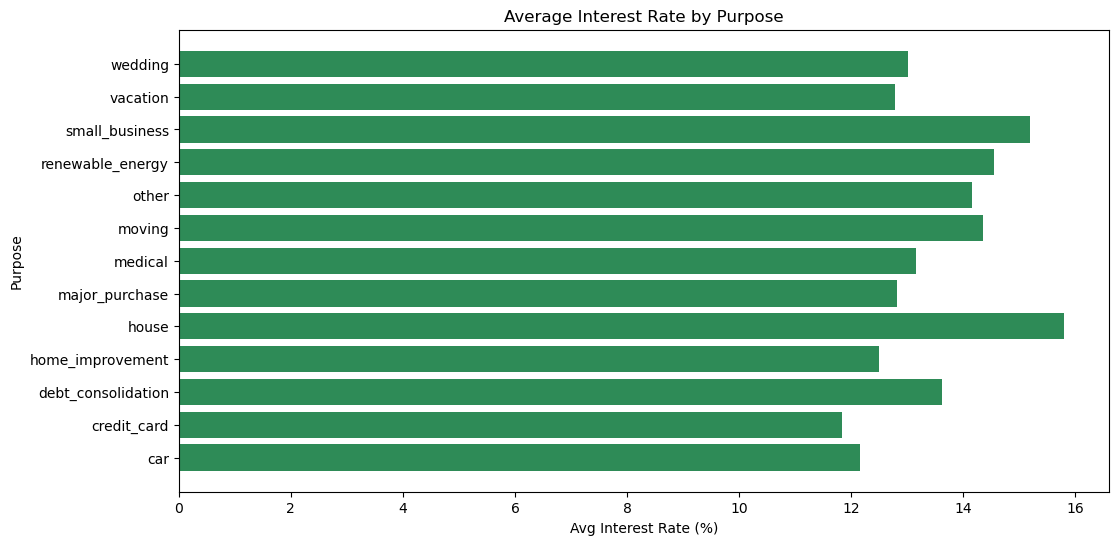

In [39]:
# Visualization: Average Interest Rate by Purpose
plt.figure(figsize=(12, 6))
plt.barh(purpose_aggregation['Purpose'], purpose_aggregation['Avg Interest Rate (%)'], color='seagreen')
plt.title('Average Interest Rate by Purpose')
plt.xlabel('Avg Interest Rate (%)')
plt.ylabel('Purpose')
plt.show()


In [40]:
purpose_aggregation


,Purpose,Avg Loan Amount,Avg Interest Rate (%),Default Rate (%)
0,car,9214.857013,12.156256,3.577532
1,credit_card,15061.150233,11.839061,4.114903
2,debt_consolidation,15750.929194,13.622147,5.184344
3,home_improvement,14290.478085,12.503909,4.220501
4,house,15477.071047,15.807133,6.037630
5,major_purchase,12172.617228,12.809097,4.869261
6,medical,9142.179054,13.156664,5.945946
7,moving,7942.072660,14.348105,6.529382
8,other,9903.905387,14.161224,5.069061
9,renewable_energy,10372.302505,14.556339,7.129094


## Feature Transformation

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
# Encode categorical columns
categorical_cols = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose']
encoder = LabelEncoder()

In [43]:
for col in categorical_cols:
    data_after_missing[col] = encoder.fit_transform(data_after_missing[col].astype(str))

# Create new features
data_after_missing['income_to_loan_ratio'] = data_after_missing['annual_inc'] / data_after_missing['loan_amnt']
data_after_missing['loan_duration_months'] = data_after_missing['term'].apply(lambda x: 36 if x == 0 else 60)


In [44]:
# Standardize numerical features
from sklearn.preprocessing import StandardScaler

In [45]:
numerical_cols = ['loan_amnt', 'installment', 'annual_inc', 'income_to_loan_ratio']
scaler = StandardScaler()


In [46]:
data_after_missing[numerical_cols] = scaler.fit_transform(data_after_missing[numerical_cols])
data_after_missing.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,income_to_loan_ratio,loan_duration_months
0,-1.346410,2300,2300.0,0,12.62,-1.325544,2,10,Unknown,11,...,1.0,2.0,2315.0,55.0,7100.0,1.0,0.0,2.0,-0.193193,36
1,0.140224,16000,16000.0,1,12.62,-0.296057,2,10,teacher,1,...,3.0,5.0,1962.0,94.0,31900.0,0.0,6.0,1.0,-0.103922,60
2,-0.942198,6025,6025.0,0,15.05,-0.847085,2,13,Front Office,7,...,1.0,2.0,1950.0,45.0,27700.0,1.0,5.0,3.0,0.002346,36
3,0.617683,20400,20400.0,0,9.44,0.762769,1,5,Manager,1,...,1.0,2.0,4240.0,60.0,46900.0,1.0,1.0,1.0,-0.321266,36
4,-0.185317,13000,13000.0,0,11.99,-0.039366,1,9,Paramedic,1,...,0.0,1.0,2996.0,78.0,7800.0,0.0,0.0,0.0,-0.065140,36


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

In [48]:
# Encode the target variable
data_after_missing['loan_status_encoded'] = data_after_missing['loan_status'].apply(
    lambda x: 1 if x in ['Charged Off', 'Default'] else 0
)

In [49]:
X = data_after_missing.drop(columns=['loan_status', 'loan_status_encoded', 'zip_code', 'emp_title', 'last_pymnt_d', 'last_credit_pull_d'])
y = data_after_missing['loan_status_encoded'] ## Target

In [50]:
# Identify categorical and numerical columns
categorical_features = ['grade', 'purpose', 'home_ownership', 'verification_status']
numerical_features = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_util']


In [51]:
# Preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)


In [52]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [53]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((607470, 62), (151868, 62), (607470,), (151868,))

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [55]:
# Logistic Regression
logreg = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression(max_iter=1000))])
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    144421
           1       0.00      0.00      0.00      7447

    accuracy                           0.95    151868
   macro avg       0.48      0.50      0.49    151868
weighted avg       0.90      0.95      0.93    151868



In [56]:
# Decision Tree
dt = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier(random_state=42))])
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95    144421
           1       0.11      0.13      0.12      7447

    accuracy                           0.91    151868
   macro avg       0.53      0.54      0.54    151868
weighted avg       0.91      0.91      0.91    151868



In [ ]:
# Random Forest
rf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=42))])
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

In [ ]:
# Compare Accuracy Scores
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}")
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

In [ ]:
# Logistic Regression Accuracy: 0.9509
# Decision Tree Accuracy: 0.9063
# Random Forest Accuracy: 0.9507

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score,roc_auc_score
from sklearn.pipeline import Pipeline


In [45]:
def predict_with_threshold(model, X_test, threshold=0.6):
    y_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1
    return (y_proba >= threshold).astype(int)

# Apply the same preprocessing to the testing data
X_test_processed = preprocessor.transform(X_test)
# Apply preprocessing to the training data
X_train_processed = preprocessor.fit_transform(X_train)
# LightGBM Training
lgbm_model = LGBMClassifier(class_weight='balanced', random_state=42)
lgbm_model.fit(X_train_processed, y_train)


# LightGBM Evaluation
y_pred_lgbm_threshold = predict_with_threshold(lgbm_model, X_test_processed, threshold=0.6)
print("\nLightGBM Performance (Threshold = 0.6):")
print(classification_report(y_test, y_pred_lgbm_threshold))
print(f"LightGBM ROC-AUC: {roc_auc_score(y_test, y_pred_lgbm_threshold):.4f}")

[LightGBM] [Info] Number of positive: 29786, number of negative: 577684
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003778 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1229
[LightGBM] [Info] Number of data points in the train set: 607470, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000

LightGBM Performance (Threshold = 0.6):
              precision    recall  f1-score   support

           0       0.98      0.80      0.88    144421
           1       0.14      0.61      0.22      7447

    accuracy                           0.79    151868
   macro avg       0.56      0.71      0.55    151868
weighted avg       0.93      0.79      0.85    151868

LightGBM ROC-AUC: 0.7060


Top 10 Features by Importance:
                             Feature  Importance
1                           int_rate        1257
3                                dti         351
4                         revol_util         347
2                         annual_inc         332
0                          loan_amnt         317
7                            grade_C          39
26           home_ownership_MORTGAGE          35
30  verification_status_Not Verified          34
32      verification_status_Verified          27
29               home_ownership_RENT          26


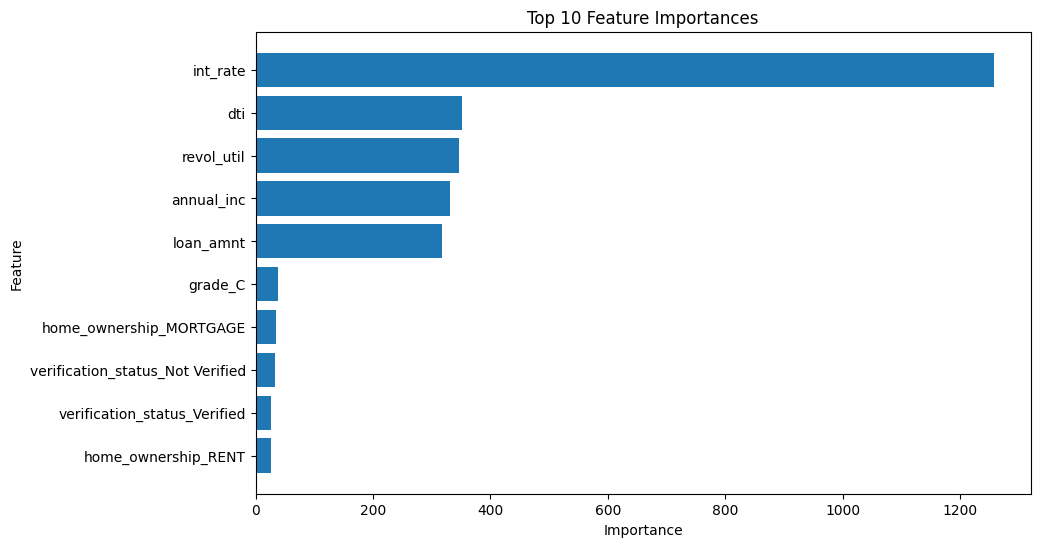

In [46]:
# Get feature names after transformation


importance = lgbm_model.feature_importances_
features = X_train.columns if hasattr(X_train, 'columns') else list(range(len(importance)))

transformed_feature_names = (
    preprocessor.named_transformers_['num'].get_feature_names_out(numerical_features).tolist() +
    preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()
)
# Ensure lengths match
if len(transformed_feature_names) != len(importance):
    raise ValueError("Mismatch between feature names and importance values.")

# Create DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': transformed_feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Display top 10 features
print("Top 10 Features by Importance:")
print(feature_importance_df.head(10))

# Plot top 10 features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10][::-1], feature_importance_df['Importance'][:10][::-1])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.show()